In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

def sub(x0, x1):
    return abs(f(x1)-f(x0))
 
def newton(x0):
    return x0 - f(x0)/df(x0)

lam = 0.01

def iterr(x0):
    return x0 - lam*f(x0)
    
   
def solve(x0, e, pltt, next):
    fig = plt.figure(1)
    delta = sub(x0, 0.1)
    while delta > e:
        x1 = x0
        fig = plt.plot(x0, f(x0), marker='.', color='r', ls='')
        x0 = next(x0)
        delta = sub(x0, x1)
    print ('Root is at: ', x0)
    print ('f(x) at root is: ', f(x0))
    

In [3]:
n = 1

def f(x):
    return x**(n + 20) + x - 1


def df(x):
    return (n + 20)*x**(n + 19) + 1

Root is at:  0.8972916221835359
f(x) at root is:  2.220446049250313e-16


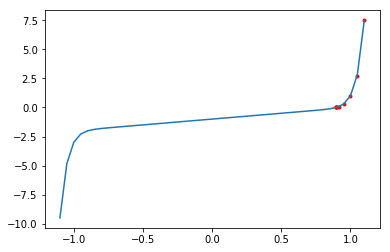

In [4]:
#метод ньютона
fig = plt.figure()
solve(1.1, 1e-8, fig, newton)
x = np.arange(-1.1, 1.105, 0.05)
y = f(x)
fig = plt.figure(1)
fig = plt.plot(x, y)

Root is at:  0.8972917034258822
f(x) at root is:  2.7652982703685325e-07


<Figure size 432x288 with 0 Axes>

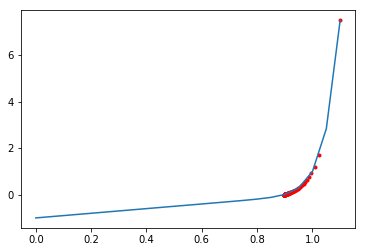

In [5]:
#прості ітерації
fig = plt.figure(2)
solve(1.1, 1e-8, fig, iterr)
x = np.arange(0, 1.105, 0.05)
y = f(x)

fig = plt.plot(x, y)

In [6]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import pylab
import math

In [7]:

def Newton_2(xo):
    eps = 10 ** (-8)
    e = 10**10
    i = 0
    while e > eps:
        A = np.array([d_f_x(xo[0], xo[1]), d_f_y(xo[0], xo[1]), d_g_x(xo[0], xo[1]), d_g_y(xo[0], xo[1])]).reshape(2, 2)
        b = -np.array([f_f(xo[0], xo[1]), f_g(xo[0], xo[1])])
        del_x = np.linalg.solve(A, b)
        x = xo + del_x
        e = abs(x - xo).max()
        xo = x
        i += 1
    return x


def f_f(x, y):
    return x**(n+17) + x*y - 1
def f_g(x, y):
    return y**(n+1) + x*y - 1
def d_f_x(x, y):
    return (n+17) * x**(n+16) + y
def d_f_y(x, y):
    return x
def d_g_x(x, y):
    return y
def d_g_y(x, y):
    return (n+1) * y**n + x

In [8]:
    x = Newton_2(np.array([-1, 1]))
    print('Roots vector is: ',x)

Roots vector is:  [-1.05794738  1.66026197]


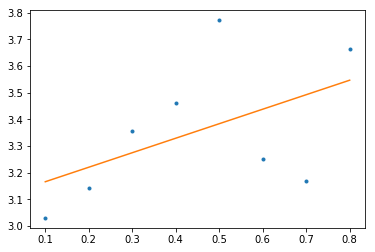

In [9]:
X = np.arange(0.1, 0.9, 0.1)
y = np.array([3.030, 3.142, 3.358, 3.463, 3.772, 3.251, 3.170, 3.665])
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
X_old = np.arange(0.1, 0.9, 0.1)
#лінійна апроксимація
z = np.polyfit(X_old, y, 1)
f = np.poly1d(z)
plt.plot(X_old, y, '.', X_old, f(X_old))

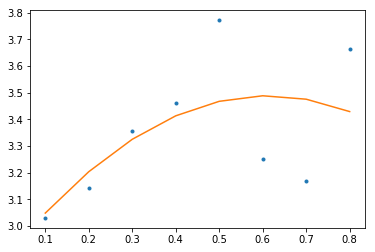

In [10]:
#апроксимація поліномом другого степеня
z = np.polyfit(X_old, y, 2)
f = np.poly1d(z)
plt.plot(X_old, y, '.', X_old, f(X_old))

In [31]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
X = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] )
#X = X.reshape(1, -1) 
#X = dataset[:,0:7]
#y = dataset[:,8]
X
y = np.array([3.030, 3.142, 3.358, 3.463, 3.772, 3.251, 3.170, 3.665])
y = y.reshape(1, -1) 
model = LogisticRegression()
res = model.fit(X, y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

ValueError: Expected 2D array, got 1D array instead:
array=[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.